Cena mieszkań w poszczególnych miastach

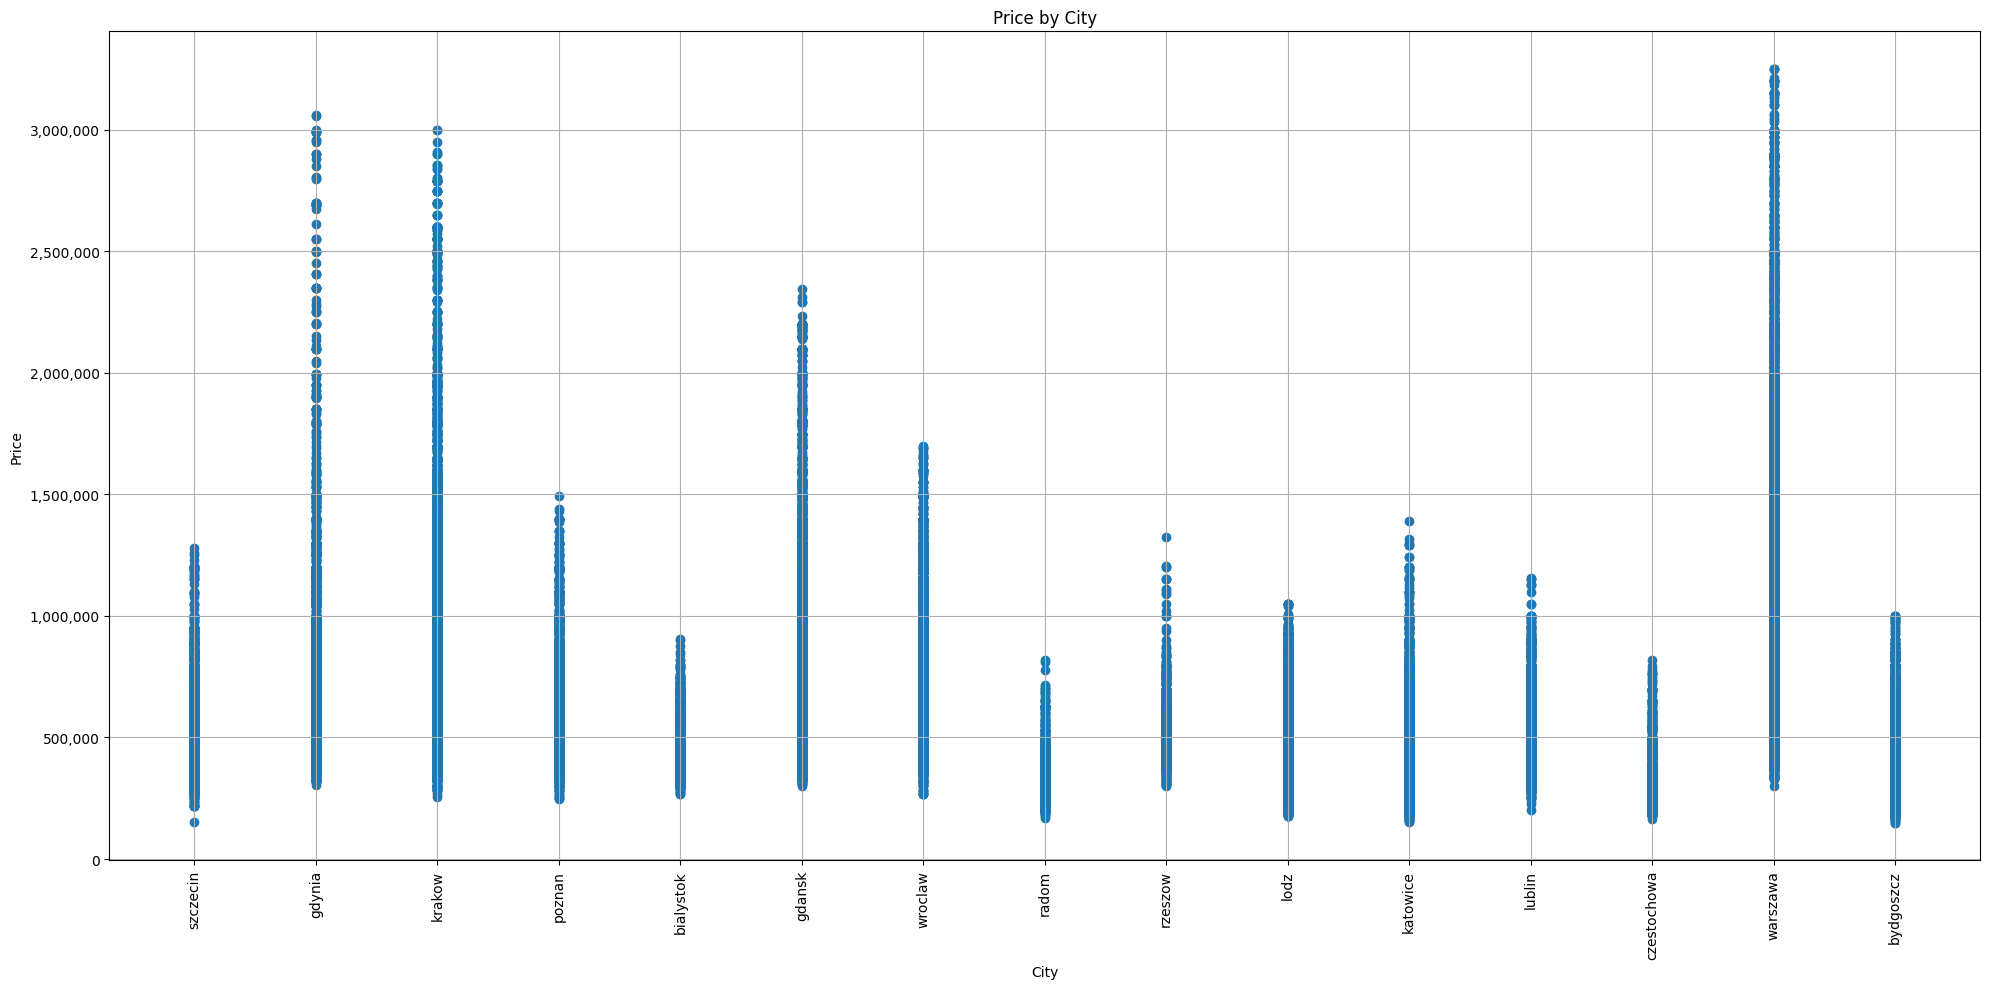

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
csv_files = [
    'apartments_pl_2023_08.csv',
    'apartments_pl_2023_11.csv',
    'apartments_pl_2024_01.csv',
    'apartments_pl_2024_03.csv',
    'apartments_pl_2024_05.csv']

dfs = []

for file in csv_files:

    df = pd.read_csv(file)

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.drop_duplicates(inplace=True)

merged_df.isnull().sum()

columns_to_drop = ['id',
                   'type',
                   'poiCount',
                   'floorCount',
                   'buildYear',
                   'latitude',
                   'longitude',
                   'schoolDistance',
                   'clinicDistance',  
                   'postOfficeDistance',
                   'kindergartenDistance',
                   'restaurantDistance',
                   'collegeDistance',
                   'pharmacyDistance',
                   'buildingMaterial',
                   'condition']

merged_df.drop(columns=columns_to_drop, inplace=True)


# Plot price by city
def y_fmt(x, _):
    return f'{int(x):,}'

# Plot price by city
plt.figure(figsize=(20, 10))  # Adjust figsize for better readability
plt.scatter(merged_df['city'], merged_df['price'], marker='o')


plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price by City')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

# Use FuncFormatter to format the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Średnia cena za metr kwadratowy w poszczególnych miastach

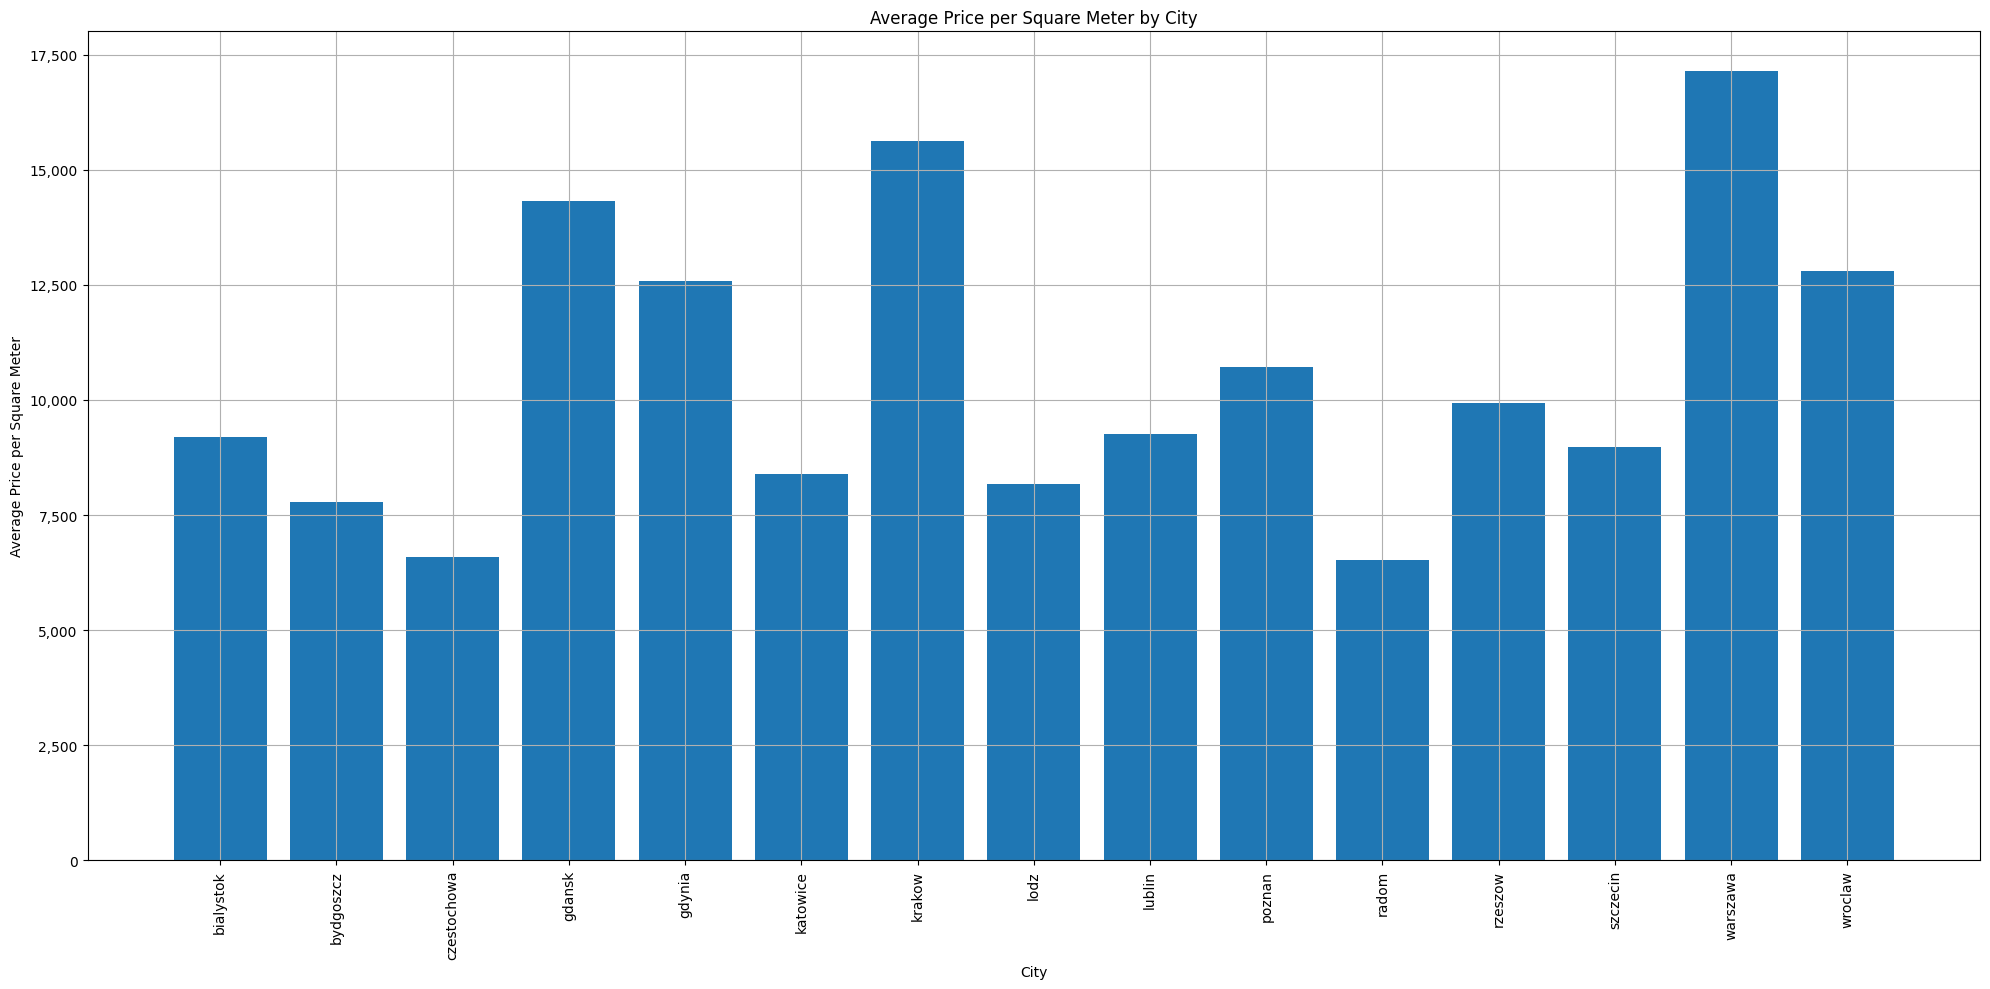

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
csv_files = [
    'apartments_pl_2023_08.csv',
    'apartments_pl_2023_11.csv',
    'apartments_pl_2024_01.csv',
    'apartments_pl_2024_03.csv',
    'apartments_pl_2024_05.csv']

dfs = []

for file in csv_files:

    df = pd.read_csv(file)

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.drop_duplicates(inplace=True)

merged_df.isnull().sum()

columns_to_drop = ['id',
                   'type',
                   'poiCount',
                   'floorCount',
                   'buildYear',
                   'latitude',
                   'longitude',
                   'schoolDistance',
                   'clinicDistance',  
                   'postOfficeDistance',
                   'kindergartenDistance',
                   'restaurantDistance',
                   'collegeDistance',
                   'pharmacyDistance',
                   'buildingMaterial',
                   'condition']

merged_df.drop(columns=columns_to_drop, inplace=True)


# Calculate average price per square meter for each city
merged_df['price_per_sqm'] = merged_df['price'] / merged_df['squareMeters']
avg_price_per_sqm = merged_df.groupby('city')['price_per_sqm'].mean().reset_index()

# Function to format the y-axis to display whole numbers
def y_fmt(x, _):
    return f'{int(x):,}'

# Plot average price per square meter by city
plt.figure(figsize=(20, 10))  # Adjust figsize for better readability
plt.bar(avg_price_per_sqm['city'], avg_price_per_sqm['price_per_sqm'])


plt.xlabel('City')
plt.ylabel('Average Price per Square Meter')
plt.title('Average Price per Square Meter by City')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

# Use FuncFormatter to format the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Średnia cena w zależności od odległości mieszkania od centrum Katowic

C:\Users\macie\AppData\Local\Temp\ipykernel_10524\4283360081.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)


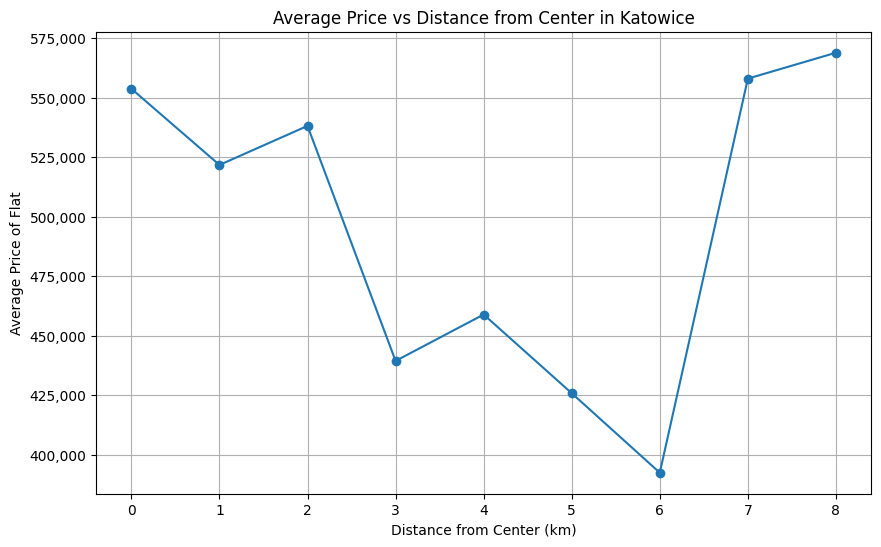

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
csv_files = [
    'apartments_pl_2023_08.csv',
    'apartments_pl_2023_11.csv',
    'apartments_pl_2024_01.csv',
    'apartments_pl_2024_03.csv',
    'apartments_pl_2024_05.csv']

dfs = []

for file in csv_files:

    df = pd.read_csv(file)

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.drop_duplicates(inplace=True)

merged_df.isnull().sum()

columns_to_drop = ['id',
                   'type',
                   'poiCount',
                   'floorCount',
                   'buildYear',
                   'latitude',
                   'longitude',
                   'schoolDistance',
                   'clinicDistance',  
                   'postOfficeDistance',
                   'kindergartenDistance',
                   'restaurantDistance',
                   'collegeDistance',
                   'pharmacyDistance',
                   'buildingMaterial',
                   'condition']

merged_df.drop(columns=columns_to_drop, inplace=True)


merged_df

katowice_df = merged_df[merged_df['city'] == 'katowice']

# Plot price by city
def y_fmt(x, _):
    return f'{int(x):,}'

# Round the 'centreDistance' values to the nearest integer
katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)

# Calculate the average price for each kilometer from the center
avg_price_per_km = katowice_df.groupby('rounded_distance')['price'].mean().reset_index()

# Plot the linear graph
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_km['rounded_distance'], avg_price_per_km['price'], marker='o', linestyle='-')
plt.title('Average Price vs Distance from Center in Katowice')
plt.xlabel('Distance from Center (km)')
plt.ylabel('Average Price of Flat')
plt.xticks(avg_price_per_km['rounded_distance'])  # Show only full kilometer ticks on x-axis
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.show()

Średnia cena mieszkania w Katowicach w zależności czy mieszkanie posiada przypisane miejsce parkingowe

C:\Users\macie\AppData\Local\Temp\ipykernel_10524\1215222037.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)


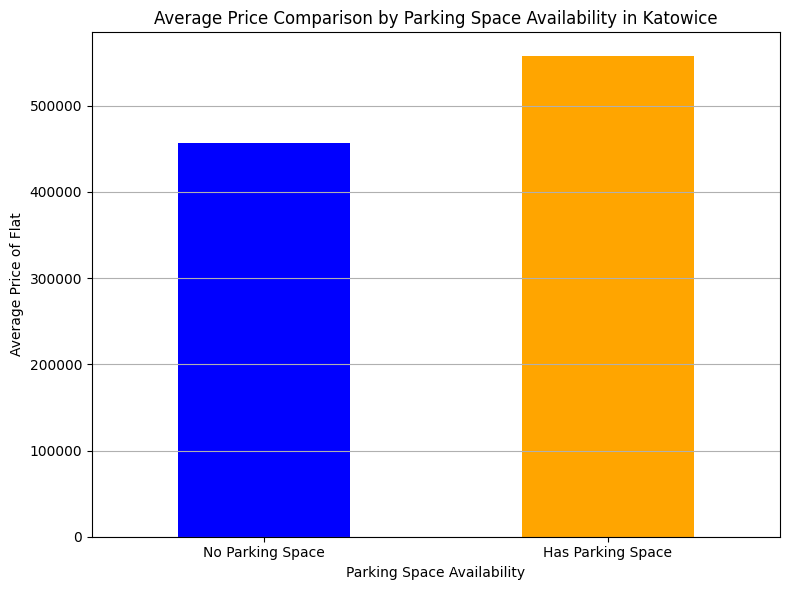

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
csv_files = [
    'apartments_pl_2023_08.csv',
    'apartments_pl_2023_11.csv',
    'apartments_pl_2024_01.csv',
    'apartments_pl_2024_03.csv',
    'apartments_pl_2024_05.csv']

dfs = []

for file in csv_files:

    df = pd.read_csv(file)

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.drop_duplicates(inplace=True)

merged_df.isnull().sum()

columns_to_drop = ['id',
                   'type',
                   'poiCount',
                   'floorCount',
                   'buildYear',
                   'latitude',
                   'longitude',
                   'schoolDistance',
                   'clinicDistance',  
                   'postOfficeDistance',
                   'kindergartenDistance',
                   'restaurantDistance',
                   'collegeDistance',
                   'pharmacyDistance',
                   'buildingMaterial',
                   'condition']

merged_df.drop(columns=columns_to_drop, inplace=True)


merged_df

katowice_df = merged_df[merged_df['city'] == 'katowice']

# Plot price by city
def y_fmt(x, _):
    return f'{int(x):,}'

# Round the 'centreDistance' values to the nearest integer
katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)

avg_price_by_parking_space = katowice_df.groupby('hasParkingSpace')['price'].mean()

# Plot the comparison
plt.figure(figsize=(8, 6))
avg_price_by_parking_space.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Price Comparison by Parking Space Availability in Katowice')
plt.xlabel('Parking Space Availability')
plt.ylabel('Average Price of Flat')
plt.xticks(range(len(avg_price_by_parking_space)), ['No Parking Space', 'Has Parking Space'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Średnia cena mieszkania w Katowicach w zależności czy mieszkanie posiada przypisane miejsce parkingowe w zależności od odległości od centrum miasta

C:\Users\macie\AppData\Local\Temp\ipykernel_10524\441342770.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)


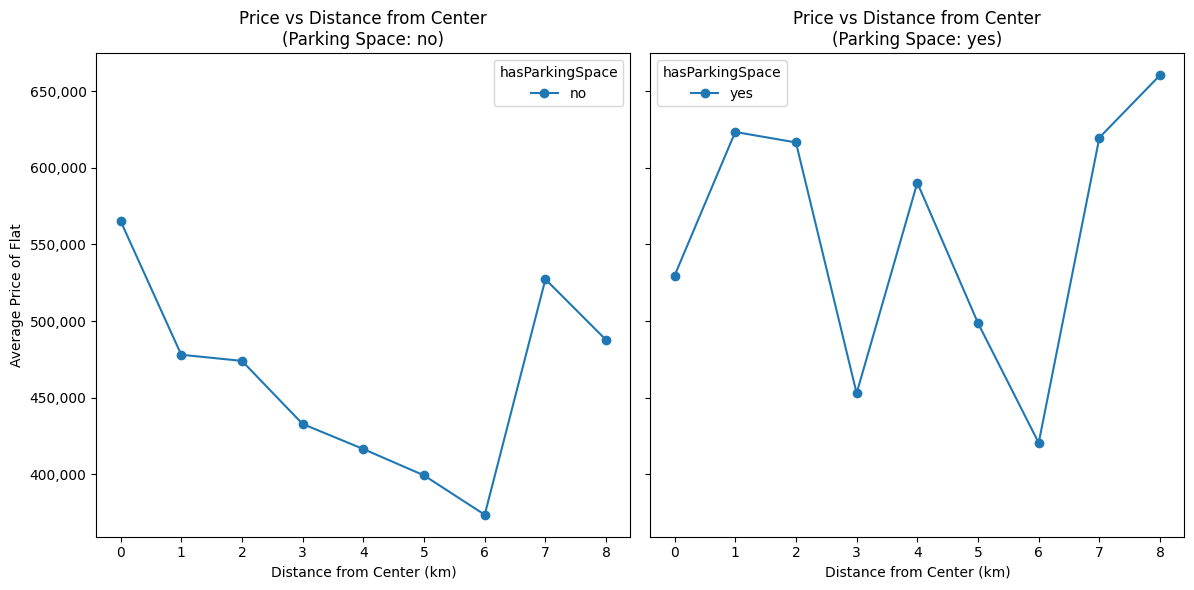

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
csv_files = [
    'apartments_pl_2023_08.csv',
    'apartments_pl_2023_11.csv',
    'apartments_pl_2024_01.csv',
    'apartments_pl_2024_03.csv',
    'apartments_pl_2024_05.csv']

dfs = []

for file in csv_files:

    df = pd.read_csv(file)

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.drop_duplicates(inplace=True)

merged_df.isnull().sum()

columns_to_drop = ['id',
                   'type',
                   'poiCount',
                   'floorCount',
                   'buildYear',
                   'latitude',
                   'longitude',
                   'schoolDistance',
                   'clinicDistance',  
                   'postOfficeDistance',
                   'kindergartenDistance',
                   'restaurantDistance',
                   'collegeDistance',
                   'pharmacyDistance',
                   'buildingMaterial',
                   'condition']

merged_df.drop(columns=columns_to_drop, inplace=True)


merged_df

katowice_df = merged_df[merged_df['city'] == 'katowice']

# Round 'centreDistance' to the nearest integer
katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)

# Plot price by city
def y_fmt(x, _):
    return f'{int(x):,}'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Group data by 'hasParkingSpace' and 'rounded_distance' and calculate average price for each category
avg_price_by_parking_space = katowice_df.groupby(['hasParkingSpace', 'rounded_distance'])['price'].mean()

# Plot the comparison for each parking space availability category
for i, (has_parking_space, data) in enumerate(avg_price_by_parking_space.groupby(level='hasParkingSpace')):
    data.unstack(level='hasParkingSpace').plot(ax=axes[i], kind='line', marker='o')
    axes[i].set_title(f'Price vs Distance from Center\n(Parking Space: {has_parking_space})')
    axes[i].set_xlabel('Distance from Center (km)')
    axes[i].set_ylabel('Average Price of Flat')

# Show plot
plt.tight_layout()

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.show()





Analiza podstawowych statystyk(część początkowa programu, poszczególne informacje znajdują się w kolejnych krokach)

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
csv_files = [
    'apartments_pl_2023_08.csv',
    'apartments_pl_2023_11.csv',
    'apartments_pl_2024_01.csv',
    'apartments_pl_2024_03.csv',
    'apartments_pl_2024_05.csv']

dfs = []

for file in csv_files:

    df = pd.read_csv(file)

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.drop_duplicates(inplace=True)

merged_df.isnull().sum()

columns_to_drop = ['id',
                   'type',
                   'poiCount',
                   'floorCount',
                   'buildYear',
                   'latitude',
                   'longitude',
                   'schoolDistance',
                   'clinicDistance',  
                   'postOfficeDistance',
                   'kindergartenDistance',
                   'restaurantDistance',
                   'collegeDistance',
                   'pharmacyDistance',
                   'buildingMaterial',
                   'condition']

merged_df.drop(columns=columns_to_drop, inplace=True)


merged_df

katowice_df = merged_df[merged_df['city'] == 'katowice']

# Round 'centreDistance' to the nearest integer
katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)

pd.set_option('display.float_format', '{:.2f}'.format)



C:\Users\macie\AppData\Local\Temp\ipykernel_10524\1584535253.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)


Podstawowe statystyki dla cen mieszkań

In [106]:
print("Podstawowe statystyki dla cen mieszkań:")
print(merged_df['price'].describe())



Podstawowe statystyki dla cen mieszkań:
count     71926.00
mean     769191.26
std      396786.03
min      150000.00
25%      518513.75
50%      689000.00
75%      899900.00
max     3250000.00
Name: price, dtype: float64


Podstawowe statystyki ceny za metr kwadratowy(ogólnie)

In [57]:
# Podstawowe statystyki dla ceny za metr kwadratowy
print("\nPodstawowe statystyki dla ceny za metr kwadratowy:")
merged_df['price_per_sqm'] = merged_df['price'] / merged_df['squareMeters']
print(merged_df['price_per_sqm'].describe())




Podstawowe statystyki dla ceny za metr kwadratowy:
count   71926.00
mean    13516.61
std      4924.95
min      3000.00
25%      9780.96
50%     12962.96
75%     16637.17
max     31041.67
Name: price_per_sqm, dtype: float64


Podstawowe statystyki dla ceny mieszkania w zależności od odległości od centrum w Katowicach:

In [107]:
# Podstawowe statystyki dla ceny mieszkania w zależności od odległości od centrum w Katowicach
katowice_df = merged_df[merged_df['city'] == 'katowice']
print("\nPodstawowe statystyki dla ceny mieszkania w zależności od odległości od centrum w Katowicach:")
print(katowice_df['price'].describe())




Podstawowe statystyki dla ceny mieszkania w zależności od odległości od centrum w Katowicach:
count      1886.00
mean     490252.88
std      203838.68
min      151200.00
25%      349000.00
50%      450000.00
75%      596849.50
max     1390000.00
Name: price, dtype: float64


Podstawowe statystyki dla średniej ceny w zależności od posiadanego miejsca parkingowego w Katowicach:

In [58]:
# Podstawowe statystyki dla średniej ceny w zależności od posiadanego miejsca parkingowego w Katowicach
print("\nPodstawowe statystyki dla średniej ceny w zależności od posiadanego miejsca parkingowego w Katowicach:")
print(katowice_df.groupby('hasParkingSpace')['price'].describe())




Podstawowe statystyki dla średniej ceny w zależności od posiadanego miejsca parkingowego w Katowicach:
                  count      mean       std       min       25%       50%  \
hasParkingSpace                                                             
no              1261.00 457022.85 179266.55 154900.00 334900.00 420000.00   
yes              625.00 557297.80 232145.53 151200.00 383000.00 499950.00   

                      75%        max  
hasParkingSpace                       
no              549000.00 1315000.00  
yes             699000.00 1390000.00  


Podstawowe statystyki dla ceny w zależności od odległości centrum z miejscem parkingowym i bez w Katowicach:

In [63]:
# Podstawowe statystyki dla ceny w zależności od centrum z miejscem parkingowym i bez w Katowicach
katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)

# Calculate the average price for each kilometer from the center

# Plot the linear graph
print("\nPodstawowe statystyki dla ceny w zależności od centrum z miejscem parkingowym i bez w Katowicach:")
print(katowice_df.groupby(['hasParkingSpace', 'rounded_distance'])['price'].describe())


Podstawowe statystyki dla ceny w zależności od centrum z miejscem parkingowym i bez w Katowicach:
                                  count      mean       std       min  \
hasParkingSpace rounded_distance                                        
no              0                131.00 565275.03 161002.48 255000.00   
                1                232.00 478012.56 192867.02 154900.00   
                2                183.00 474008.87 175524.00 208999.00   
                3                165.00 432852.83 140570.05 169000.00   
                4                189.00 416540.10 167985.01 154900.00   
                5                184.00 399329.04 148010.32 179000.00   
                6                 78.00 373676.58 163550.32 169900.00   
                7                 90.00 527258.13 222340.45 169000.00   
                8                  9.00 487655.56 160135.31 325000.00   
yes             0                 62.00 529534.79 183181.21 205440.00   
                1        

C:\Users\macie\AppData\Local\Temp\ipykernel_10524\4042056418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  katowice_df['rounded_distance'] = katowice_df['centreDistance'].round().astype(int)


Testy statystyczne - analiza rozkładu

In [103]:
shapiro_test_price = stats.shapiro(katowice_df['price'])

merged_df['price_per_sqm'] = merged_df['price'] / merged_df['squareMeters']
avg_price_per_sqm = merged_df.groupby('city')['price_per_sqm'].mean().reset_index()
merged_df
print("\nTest Shapiro-Wilka na normalność rozkładu ceny mieszkań:")
print(f"Statistic: {shapiro_test_price.statistic}, p-value: {shapiro_test_price.pvalue}")

# Test Shapiro-Wilka na normalność rozkładu dla ceny za metr kwadratowy
shapiro_test_price_per_sqm = stats.shapiro(merged_df['price_per_sqm'])
print("\nTest Shapiro-Wilka na normalność rozkładu ceny za metr kwadratowy:")
print(f"Statistic: {shapiro_test_price_per_sqm.statistic}, p-value: {shapiro_test_price_per_sqm.pvalue}")

# Test t-Studenta dla porównania średnich cen mieszkań w zależności od posiadanego miejsca parkingowego w Katowicach
parking_yes = katowice_df[katowice_df['hasParkingSpace'] == 'yes']['price']
parking_no = katowice_df[katowice_df['hasParkingSpace'] == 'no']['price']
ttest_parking = stats.ttest_ind(parking_yes, parking_no)
print("\nTest t-Studenta dla średnich cen mieszkań w zależności od posiadanego miejsca parkingowego:")
print(f"Statistic: {ttest_parking.statistic}, p-value: {ttest_parking.pvalue}")
# Test ANOVA dla ceny mieszkań w zależności od odległości od centrum w Katowicach
normaltest_results = {}
for distance_category in [1, 2, 3, 4, 5, 6, 7, 8]:  # Replace with your actual integer distance values
    data = katowice_df[katowice_df['rounded_distance'] == distance_category]['price']
    normaltest_results[distance_category] = stats.normaltest(data)

# Print normality test results
print("\nNormality Test Results for flat price depending on distance from the center in Katowice:")
for distance_category, result in normaltest_results.items():
    print(f"Distance Category: {distance_category}, p-value: {result.pvalue}")


Test Shapiro-Wilka na normalność rozkładu ceny mieszkań:
Statistic: 0.9277704219779487, p-value: 3.166914768041755e-29

Test Shapiro-Wilka na normalność rozkładu ceny za metr kwadratowy:
Statistic: 0.9721038258667618, p-value: 4.218202608984342e-74

Test t-Studenta dla średnich cen mieszkań w zależności od posiadanego miejsca parkingowego:
Statistic: 10.33453695556502, p-value: 2.1738288052163194e-24

Normality Test Results for flat price depending on distance from the center in Katowice:
Distance Category: 1, p-value: 3.7040798184094374e-11
Distance Category: 2, p-value: 1.5177616559674028e-17
Distance Category: 3, p-value: 1.1065182566475981e-21
Distance Category: 4, p-value: 2.584777941056685e-14
Distance Category: 5, p-value: 1.1556303116985815e-08
Distance Category: 6, p-value: 2.429490915595843e-10
Distance Category: 7, p-value: 0.016996204138445697
Distance Category: 8, p-value: 0.04569378479723027


C:\Users\macie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71926.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\macie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
